In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
# # Load example data
# data_df = mavenn.load_example_dataset('sortseq')

# # Separate test from data_df
# ix_test = data_df['set']=='test'
# test_df = data_df[ix_test].reset_index(drop=True)
# print(f'test N: {len(test_df):,}')

# # Remove test data from data_df
# data_df = data_df[~ix_test].reset_index(drop=True)
# print(f'training + validation N: {len(data_df):,}')
# data_df.head()
#pd.read_csv
data_df_full = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df = data_df_full[cols].copy()
data_df.head(10)

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
5,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,39,7,0,3,83,4,0,14,101,...,0,0,140,4,0,0,56,8,549,0
6,NITNLCPFGEVFNATRFVSVYAWNRKRISNCVADYSVLYNSASFST...,1,1,24,154,0,0,1,104,3,...,2,0,48,0,0,0,102,1,0,0
7,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,4,0,0,0,1,0,...,0,0,0,0,0,0,3,0,0,0
8,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,1,0,59,7,0,4,53,23,3,...,5,0,4,0,0,0,26,4,0,0
9,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,16,0,0,0,4,0,...,0,0,8,0,0,0,0,0,0,0


In [3]:
X = data_df['x']
y = data_df[y_cols]

In [4]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y']


Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=201, Y=64


In [6]:
# instantiate gpmap object
gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)


2022-05-19 23:11:24.617041: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Create measurement process object(s)

In [7]:
# I think this shouldn't require any positional arguments.
# mp_GE = mavenn.measurement_process_layers.GlobalEpistasisLayer(K=50,
#                                                                eta=1e-5,
#                                                                monotonic=True)
mp_mpa = mavenn.measurement_process_layers.DiscreteAgnosticMP(info_for_layers_dict={'H_y_norm':0},
                                                                      Y=Y,
                                                                      K=50,
                                                                      eta=1e-5,)


In [8]:
model = mavenn.Model2(gpmap=gpmap,
                      mp_list=[mp_mpa])

In [9]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [10]:
# Set training data
model.set_data(x=x_train.values,
               y_list=[y_train.values],
               #validation_flags=(data_df['set']=='validation'),
               shuffle=True)


N = 74,560 observations set as training data.
Using 20.0% for validation.
Data shuffled.
Time to set data: 12.0 sec.


In [11]:

# Fit model to data
model.fit(learning_rate=.0005,
          epochs=300,
          batch_size=300,
          try_tqdm = False,
          early_stopping=True,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/300
199/199 [==============================] - 5s 17ms/step - loss: 2593228.7500 - I_var: -0.0767 - val_loss: 2605266.2500 - val_I_var: -0.0378
Epoch 2/300
199/199 [==============================] - 3s 16ms/step - loss: 2566475.7500 - I_var: -0.0180 - val_loss: 2590526.7500 - val_I_var: -0.0142
Epoch 3/300
199/199 [==============================] - 3s 17ms/step - loss: 2564918.5000 - I_var: -0.0142 - val_loss: 2589563.2500 - val_I_var: -0.0136
Epoch 4/300
199/199 [==============================] - 3s 17ms/step - loss: 2565777.5000 - I_var: -0.0152 - val_loss: 2592976.5000 - val_I_var: -0.0179
Epoch 5/300
199/199 [==============================] - 4s 18ms/step - loss: 2563778.0000 - I_var: -0.0123 - val_loss: 2607770.5000 - val_I_var: -0.0417
Epoch 6/300
199/199 [==============================] - 4s 19ms/step - loss: 2567563.7500 - I_var: -0.0198 - val_loss: 2591651.2500 - val_I_var: -0.0153
Epoch 7/300
199/199 [==============================] - 5s 26ms/step - loss: 2564830.5000

199/199 [==============================] - 4s 20ms/step - loss: 2353471.7500 - I_var: 0.4259 - val_loss: 2387253.5000 - val_I_var: 0.4134
Epoch 56/300
199/199 [==============================] - 4s 18ms/step - loss: 2352718.0000 - I_var: 0.4269 - val_loss: 2386722.2500 - val_I_var: 0.4146
Epoch 57/300
199/199 [==============================] - 3s 17ms/step - loss: 2351504.7500 - I_var: 0.4274 - val_loss: 2385013.5000 - val_I_var: 0.4177
Epoch 58/300
199/199 [==============================] - 3s 17ms/step - loss: 2350889.2500 - I_var: 0.4306 - val_loss: 2384716.2500 - val_I_var: 0.4186
Epoch 59/300
199/199 [==============================] - 5s 27ms/step - loss: 2349895.0000 - I_var: 0.4328 - val_loss: 2391927.0000 - val_I_var: 0.4014
Epoch 60/300
199/199 [==============================] - 3s 16ms/step - loss: 2349364.5000 - I_var: 0.4338 - val_loss: 2382588.0000 - val_I_var: 0.4219
Epoch 61/300
199/199 [==============================] - 3s 16ms/step - loss: 2348631.2500 - I_var: 0.4350 -

199/199 [==============================] - 3s 17ms/step - loss: 2331869.2500 - I_var: 0.4710 - val_loss: 2367825.0000 - val_I_var: 0.4538
Epoch 110/300
199/199 [==============================] - 3s 15ms/step - loss: 2331576.2500 - I_var: 0.4721 - val_loss: 2368019.7500 - val_I_var: 0.4515
Epoch 111/300
199/199 [==============================] - 3s 13ms/step - loss: 2331502.5000 - I_var: 0.4723 - val_loss: 2365228.2500 - val_I_var: 0.4563
Epoch 112/300
199/199 [==============================] - 3s 16ms/step - loss: 2331104.2500 - I_var: 0.4728 - val_loss: 2366971.2500 - val_I_var: 0.4534
Epoch 113/300
199/199 [==============================] - 3s 14ms/step - loss: 2331121.2500 - I_var: 0.4725 - val_loss: 2367649.0000 - val_I_var: 0.4545
Epoch 114/300
199/199 [==============================] - 3s 17ms/step - loss: 2331094.5000 - I_var: 0.4732 - val_loss: 2364798.5000 - val_I_var: 0.4569
Epoch 115/300
199/199 [==============================] - 3s 13ms/step - loss: 2330401.7500 - I_var: 0.

In [12]:
x_test

42894    NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...
79629    NITNLCPFGEVFNTTRFASVYAWNRKRISNCVADYSVLYNSASFST...
12248    NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSFLYNSASFST...
81782    NITNLCPFGEVFNSTRFASVYAWNRKRISNCVADYSVLYNSASFST...
21832    NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...
                               ...                        
9562     NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...
73936    NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...
50554    NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...
63117    NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...
77129    NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...
Name: x, Length: 18641, dtype: object

On test data:


Text(0.5, 1.0, 'training hisotry')

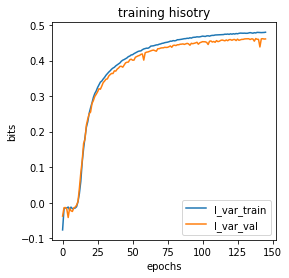

In [13]:
# Show training history
print('On test data:')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')

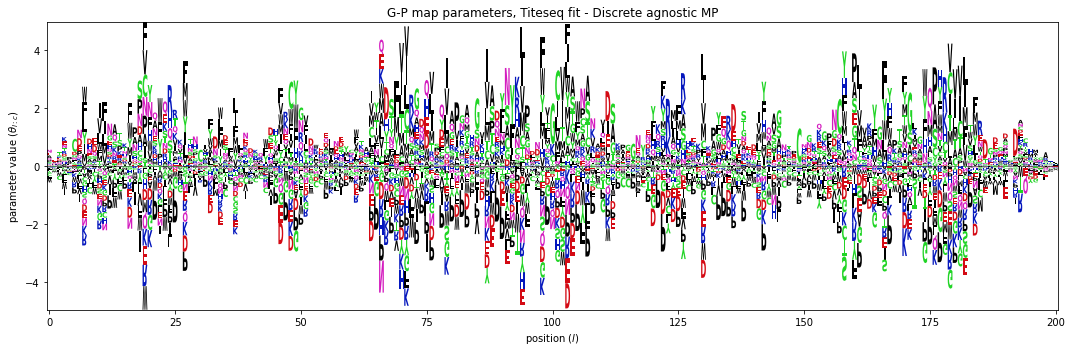

In [14]:
# Get G-P map parameters in matrix form
theta = np.squeeze(gpmap.weights[1].numpy())

# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_mpa.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
#measurement_process = mp_mpa.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, axs = plt.subplots(1,1,figsize=[15,5])

# Left panel: draw logo using logomaker
ax = axs
logo = logomaker.Logo(pd.DataFrame(theta,columns=model.alphabet), ax=ax,center_values=True)
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters, Titeseq fit - Discrete agnostic MP')

# Right panel: draw measurement process as heatmap
# ax = axs[1]
# im = ax.imshow(measurement_process,
#                cmap='Greens',
#                extent=phi_lim+y_lim,
#                vmin=0,
#                origin='lower',
#                interpolation='nearest',
#                aspect="auto")
# ax.set_yticks(y_all)
# ax.set_ylabel('bin number (y)')
# ax.set_xlabel('latent phenotype ($\phi$)')
# ax.set_title('measurement process')
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout()
fig.savefig('ace2rbd_g-p_map_mpa_titeseq_only_DA-MP.png',dpi=300,bbox_inches='tight')
plt.show()

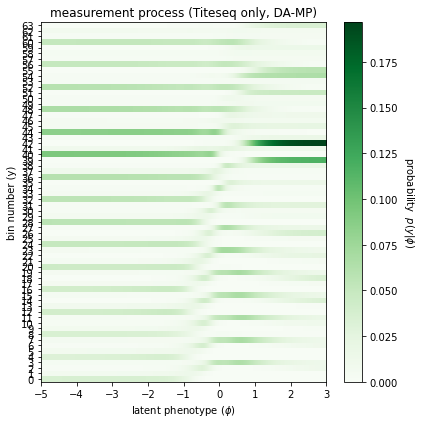

In [16]:
# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_mpa.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process = mp_mpa.p_of_y_given_phi(y_all, phi_grid)


# Create figure with two panels
fig, ax = plt.subplots(1,1,figsize=[6,6])

# Right panel: draw measurement process as heatmap
im = ax.imshow(measurement_process,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process (Titeseq only, DA-MP)')
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()
fig.savefig('ace2rbd_mpa_measurment_prcoess_titeseq_DAMP_only.png',dpi=300,bbox_inches='tight')


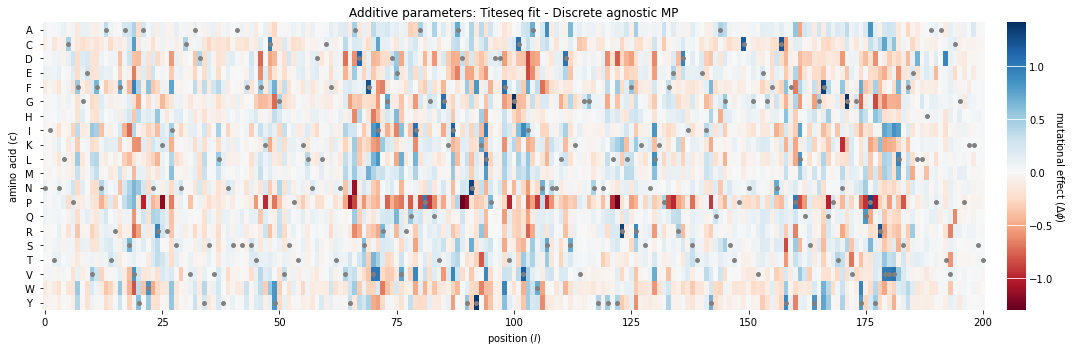

In [17]:
# Create figure
fig, ax = plt.subplots(1,1, figsize=(15,5))

# Draw heatmap
heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=logo.df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'gray', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive parameters: Titeseq fit - Discrete agnostic MP')

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_mpa_titeseq_only_heatmap.png',dpi=300,bbox_inches='tight')

In [37]:
np.save('titeseq_gpmap_discrete_agnostic',logo.df.values.ravel())
#np.save('titeseq_gpmap_discrete_agnostic',theta.ravel())

In [38]:
sortseq_gpmap = np.load('sortseq_gpmap_discrete_agnostic.npy')
titeseq_gpmap = np.load('titeseq_gpmap_discrete_agnostic.npy')

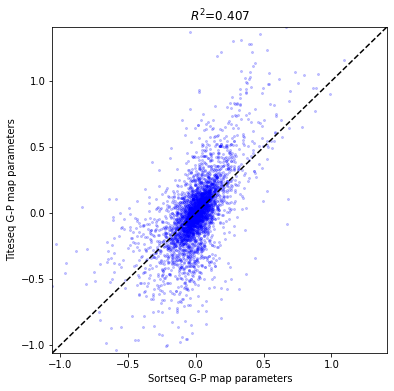

In [44]:
plt.figure(figsize=(6,6))
# Compute R^2 between yhat_test and y_test
Rsq = np.corrcoef(sortseq_gpmap,titeseq_gpmap)[0, 1]**2

# Style plot
xlim = [min(sortseq_gpmap), max(titeseq_gpmap)]

plt.scatter(sortseq_gpmap,titeseq_gpmap,s=4,color='blue',alpha=0.2)
plt.xlabel('Sortseq G-P map parameters')
plt.ylabel('Titeseq G-P map parameters')
plt.title(f'$R^2$={Rsq:.3}');
plt.plot(xlim, xlim, '--', color='k', label='diagonal')
plt.xlim(xlim)
plt.ylim(xlim)
plt.show()

In [34]:
xlim

[-1.8997612, 0.897715]